The following code can be used for a fast investigation of the measurements. It prvides information about the standard deviation of each sensormeasurement around the FC-Stack, can be used for the plotting and saving of any other measurement data related treatment.
Follow the next steps to observe your Data.

Therefore, you will need at least 3 Sets of Data for front, central and rear measurement plane. If not existing, just use 3 times the same. Repeat this for the noise measurements.

For any questions, first read the DOCUMENTATION. Secondly have a look in the classes "ExperimentClass.py" and "InvestigationClass.py". Last but not least, you can ask the author of this Code "Leonard Freisem" for further help.

In [1]:
from tracemalloc import stop
from turtle import color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from collectAllMeasureDataInOneFile import*
import seaborn as sns
from scipy.fft import fft, ifft
from ExperimentClass import*
from InvestigationClass import*

In the following chose the measurement folder for the noise and set the measurement files. Set here the REFERENCE!!!

The variable "scaleTo" is the scaling factor. You normaly want to scale your reference to the current of your faulty measurement.

Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Clean Noise from measurements start
Clean Noise from measurements end
Clean Noise from measurements start
Clean Noise from measurements end
Clean Noise from measurements start
Clean Noise from measurements end
Calculate Mean values noise free start
Calculate Mean values noise free end
Calculate Mean values noise free start
Calculate Mean values noise free end
Calculate Mean values noise free start
Calculate Mean values noise free end
0        4.385484
1        4.386766
2        4.386926
3        4.386045
4        4.388769
           ...   
47995    4.388689
47996    4.390131
47997    4.389089
47998    4.391413
47999    4.389410
Name: V_Pile_0_32, Length: 48000, dtype:

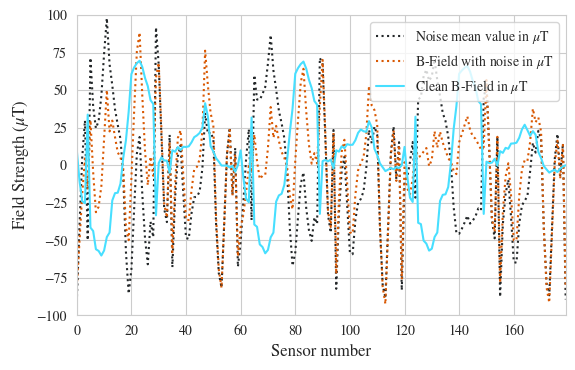

In [2]:
scaleTo = 110

noiseBFieldPath = r'C:\Users\freiseml\Nextcloud\01_France\04_Stage\00-Travail\03-PAC\Mesure_2021\2021_06_18\Bruit\\'
filenamenoiseAV = "Ref_Bruit_Ambiant_FM_Aux_On_AV.lvm"
filenamenoiseCenter = "Ref_Bruit_Ambiant_FM_Aux_On_Centre.lvm"
filenamenoiseAR = "Ref_Bruit_Ambiant_FM_Aux_On_AR.lvm"

bFieldPath = r"C:\Users\freiseml\Nextcloud\01_France\04_Stage\00-Travail\03-PAC\Mesure_2021\2021_06_18\Pile_Saine\\"
filenameAV = 'Ref_Pile_I100A_AV.lvm'                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!
filenameC = 'Ref_Pile_I100A_Centre.lvm'                  ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!
filenameAR = 'Ref_Pile_I100A_AR.lvm'                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!

measuredCurrent = 100
measurementName = "Reference 100 A"
measurementDate = "18.06.2021"
measurementYear = 2021

Ref100AExperiment2021_07_28 = Experiment(measurementYear, measurementName, measurementDate, measuredCurrent, scaleTo, noiseBFieldPath, filenamenoiseAV, filenamenoiseCenter,filenamenoiseAR, bFieldPath, filenameAV, filenameC, filenameAR)

refExperiment = Ref100AExperiment2021_07_28

In the following chose the measurement folder for the noise and set the measurement files. Set here the INVESTIGATION MEASUREMENT!!!


Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Calculate Mean values start
Calculate Mean values end
Clean Noise from measurements start
Clean Noise from measurements end
Clean Noise from measurements start
Clean Noise from measurements end
Clean Noise from measurements start
Clean Noise from measurements end
Calculate Mean values noise free start
Calculate Mean values noise free end
Calculate Mean values noise free start
Calculate Mean values noise free end
Calculate Mean values noise free start
Calculate Mean values noise free end
0        4.335575
1        4.337177
2        4.333091
3        4.338218
4        4.336055
           ...   
47995    4.332691
47996    4.334693
47997    4.333972
47998    4.334133
47999    4.334133
Name: V_Pile_0_32, Length: 48000, dtype:

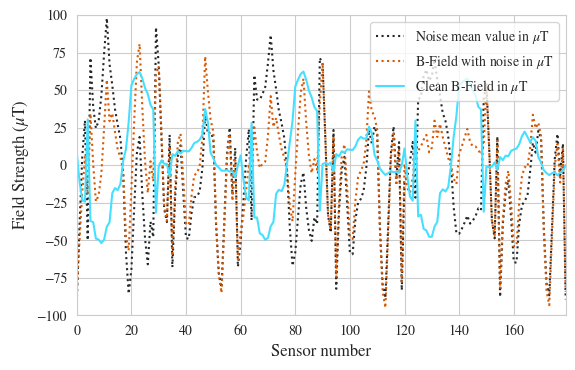

In [3]:
## 100A Humidity 20 % 2021_07_28 100 A #####################################################################################
noiseBFieldPath = r'C:\Users\freiseml\Nextcloud\01_France\04_Stage\00-Travail\03-PAC\Mesure_2021\2021_06_18\Bruit\\'
filenamenoiseAV = "Ref_Bruit_Ambiant_FM_Aux_On_AV.lvm"
filenamenoiseCenter = "Ref_Bruit_Ambiant_FM_Aux_On_Centre.lvm"
filenamenoiseAR = "Ref_Bruit_Ambiant_FM_Aux_On_AR.lvm"

bFieldPath = r"C:\Users\freiseml\Nextcloud\01_France\04_Stage\00-Travail\03-PAC\Mesure_2021\2021_06_18\Stockio1_5\\"
filenameAR = 'Def_Stoch1_5_I100A_AR.lvm'                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!
filenameC = 'Def_Stoch1_5_I100A_Centre.lvm'                  ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!
filenameAV = 'Def_Stoch1_5_I100A_AV.lvm'                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!

measuredCurrent = 100
measurementName = "Stoichiometry 1.5 100 A"
measurementDate = "18.06.2021"
measurementYear = 2021

Humidity100AExperiment2021_07_28 = Experiment(measurementYear, measurementName, measurementDate, measuredCurrent, scaleTo, noiseBFieldPath, filenamenoiseAV, filenamenoiseCenter,filenamenoiseAR, bFieldPath, filenameAV, filenameC, filenameAR)
testExperiment = Humidity100AExperiment2021_07_28

Here you can chose the sensors you want to have mapped on the sensor file. This is adopted to MIPSE .dat files with x|y|z|u|v|w|B

In [13]:
sensorsOfInterest = np.linspace(0, 29, 30, dtype=int)
sensorsOfInterest = np.delete(sensorsOfInterest, 4)
sensorsOfInterest = np.delete(sensorsOfInterest, 27)

Here you can create a Testinvestigation to see the differential field, and map automatically the desired field values on the sensors

            0         1        2         3         4    5
0    0.133000  0.000000 -0.03684  1.000000  0.000000  0.0
1    0.133000  0.028270 -0.03684  0.981047  0.193770  0.0
2    0.133000  0.059215 -0.03684  0.917849  0.396931  0.0
3    0.133000  0.096630 -0.03684  0.802050  0.597257  0.0
4    0.100548  0.111670 -0.03684  0.637739  0.770253  0.0
..        ...       ...      ...       ...       ...  ...
175  0.061300 -0.106200  0.02880  0.000000  0.000000  1.0
176  0.095600 -0.106200  0.02880  0.000000  0.000000  1.0
177  0.127500 -0.092600  0.02880  0.000000  0.000000  1.0
178  0.127500 -0.056800  0.02880  0.000000  0.000000  1.0
179  0.127500 -0.027100  0.02880  0.000000  0.000000  1.0

[180 rows x 6 columns]
[[ 0.133       0.         -0.03684     1.          0.          0.
   0.01658821]
 [ 0.133       0.02827002 -0.03684     0.98104691  0.19377039  0.
   0.00755678]
 [ 0.133       0.05921542 -0.03684     0.91784857  0.39693072  0.
   0.00197566]
 [ 0.133       0.09663016 -0.03684   

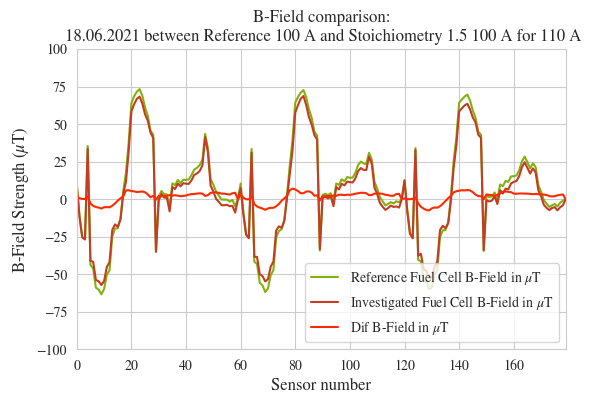

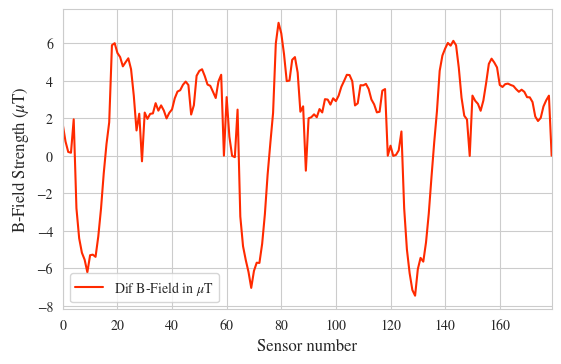

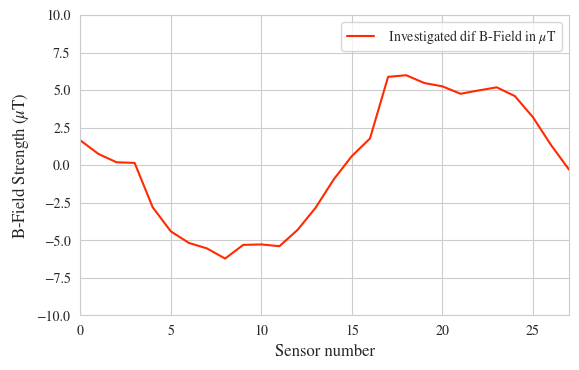

In [14]:
TestInvestigation = Investigation(refExperiment, testExperiment, sensorsOfInterest)

Use this cell to set again a desired plane and the sensors you want to check for standard deviation and the shape of the field around the FC

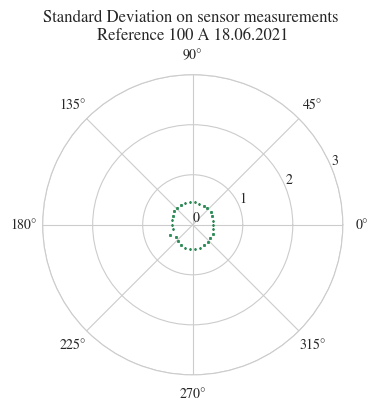

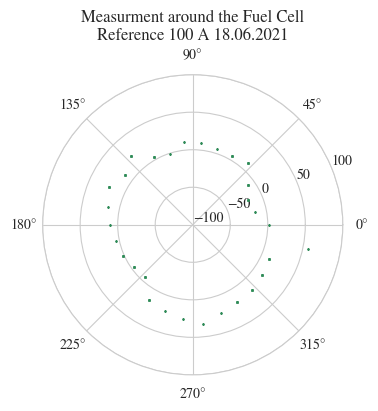

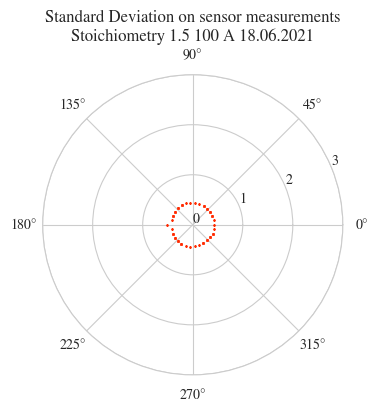

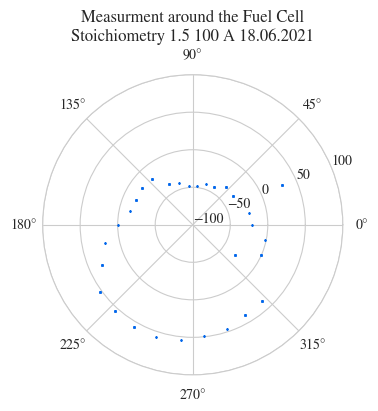

In [10]:
## plot sensor circle with errorbars:

sensorsOfInterest = np.linspace(2, 32, 30, dtype=int)

# Calculate standard deviation of each Sensor:
r2020 = np.zeros(len(sensorsOfInterest))
yErr2020 = np.zeros(len(sensorsOfInterest))
npos = 0
for i in sensorsOfInterest:
    r2020[npos] = refExperiment.bFieldDataAR.iloc[:,i].mean()*refExperiment.arrayPlotFactor
    yErr2020[npos] = refExperiment.bFieldDataAR.iloc[:,i].std(ddof=1)*refExperiment.arrayPlotFactor
    npos = npos+1

# get angle position of each sensor around the FC-Stack
theta = np.arange(0, 2 * np.pi, np.pi / 15)

## plot Standard Deviation on sensors
fig, ax1 = plt.subplots(1, 1, figsize=set_size(), sharey=True, subplot_kw={'projection': 'polar'})
ax1.errorbar(theta, yErr2020, xerr=0, yerr=0, capsize=1,fmt=",", c="seagreen")
ax1.set_title("Standard Deviation on sensor measurements "+ "\n" +refExperiment.name + " " + refExperiment.date)
ax1.set_rticks([0, 1,  2,3])
fig.savefig(refExperiment.bFieldPath + refExperiment.name + "_Std_Polar.pdf")

## plot Values on sensors
fig, ax2 = plt.subplots(1, 1, figsize=set_size(), sharey=True, subplot_kw={'projection': 'polar'})
ax2.errorbar(theta, r2020, xerr=0, yerr=0, capsize=1,fmt=",", c="seagreen")
ax2.set_title("Measurment around the Fuel Cell"+ "\n" +refExperiment.name + " " + refExperiment.date)
ax2.set_rticks([-100, -50, 0, 50, 100])
fig.savefig(refExperiment.bFieldPath + refExperiment.name + "_Measurement_Polar.pdf")


r2021 = np.zeros(len(sensorsOfInterest))
yErr2021 = np.zeros(len(sensorsOfInterest))
npos = 0
for i in sensorsOfInterest:
    r2021[npos] = testExperiment.BFieldCleanMeasurementAR.iloc[:,i].mean()*testExperiment.arrayPlotFactor
    yErr2021[npos] = testExperiment.BFieldCleanMeasurementAR.iloc[:,i].std(ddof=1)*testExperiment.arrayPlotFactor
    npos = npos+1

fig, ax3 = plt.subplots(1, 1, figsize=set_size(), sharey=True, subplot_kw={'projection': 'polar'})
ax3.errorbar(theta, yErr2021, xerr=0, yerr=0, capsize=1,fmt=",", c=specific_colors['MPM_red'])
ax3.set_title("Standard Deviation on sensor measurements"+ "\n" +testExperiment.name + " " + testExperiment.date)
ax3.set_rticks([0, 1,  2, 3])
fig.savefig(testExperiment.bFieldPath + testExperiment.name + "_Std_Polar.pdf")

fig, ax4 = plt.subplots(1, 1, figsize=set_size(), sharey=True, subplot_kw={'projection': 'polar'})
ax4.errorbar(theta, r2021, xerr=0, yerr=0, capsize=1,fmt=",", c=specific_colors["MPM"])
ax4.set_title("Measurment around the Fuel Cell"+ "\n" +testExperiment.name + " " + testExperiment.date)
ax4.set_rticks([-100, -50, 0, 50, 100])
fig.savefig(testExperiment.bFieldPath + testExperiment.name + "_Measurement_Polar.pdf")
plt.show()

In [ ]:
print(refExperiment.stackGlobalTensionAV.mean())

For comparison and vizualisation of the field on the different planes and direction. Mostly for orienation porpuses but can also be used for other interesting plots

In [ ]:
## chose values to plot
plt.plot(np.multiply(refExperiment.measuredCleanField,testExperiment.arrayPlotFactor), label= refExperiment.name)
plt.plot(np.multiply(testExperiment.measuredCleanField, testExperiment.arrayPlotFactor), label= testExperiment.name)

## adjust axes if needed
ymin = -180
ymax = 150
plt.ylim(ymin, ymax)
plt.xlim(0,180)
## set red lines for each 30 sensors
plt.vlines(30,ymin, ymax,'r')
plt.vlines(60,ymin, ymax,'r')
plt.vlines(90,ymin, ymax,'r')
plt.vlines(120,ymin, ymax,'r')
plt.vlines(150,ymin, ymax,'r')
plt.xlabel("Sensor number")
plt.ylabel("Field Strength ($\mu$T)")
plt.legend()

Start with the observation of a single Sensor. Chose exactly the same name, as it is used in the given lvm file for the further comparison

In [ ]:
sensorName = 'S2_V7_C8_X_AI02'
measurementMean2020 = refExperiment.bFieldDataAV.loc[:,sensorName].mean()
measurementMean2021 = refExperiment.BFieldCleanMeasurementAR.loc[:,sensorName].mean()
print("2020 Mean:",measurementMean2020)
print("Stoichio 2020 Mean:",measurementMean2021)

Plot B-Field over time

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=set_size(), sharey=True)
ax1.plot(refExperiment.noiseDataAR.loc[:,sensorName]*testExperiment.arrayPlotFactor)

plt.xlabel("t")
plt.ylabel("Field Strength ($\mu$T)")
ax2.plot(refExperiment.bFieldDataAR.loc[:,sensorName]*testExperiment.arrayPlotFactor)
factor = testExperiment.arrayPlotFactor
plt.xlabel("t")
plt.ylabel("Field Strength ($\mu$T)")


In [ ]:
## Plot all sensor Values to see, if sensors are saturated
## set colors for 60 sensors
colors = plt.cm.jet(np.linspace(0,1,30+2))
## for sensors AV:
sensorsAVBu = np.linspace(2, 2+29, 30, dtype=int)
sensorsAVBw = np.linspace(2+30, 2+59, 30, dtype=int)

sensorsCBu = np.linspace(2, 2+29, 30, dtype=int)
sensorsCBw = np.linspace(2+30, 2+59, 30, dtype=int)

sensorsCBu = np.linspace(2+130, 2+159, 30, dtype=int)
sensorsCBw = np.linspace(2+160, 2+179, 30, dtype=int)


fig, axs = plt.subplots(1, 1, figsize=set_size(), sharey=True)

for i in sensorsAVBu:
    plt.plot(refExperiment.bFieldDataAV.iloc[:,i]*refExperiment.arrayPlotFactor, label = refExperiment.bFieldDataAV.iloc[i].name)
    




In [ ]:
fig, axs = plt.subplots(1, 1, figsize=set_size(), sharey=True)

for i in sensorsAVBw:
    plt.plot(refExperiment.bFieldDataAV.iloc[:,i]*refExperiment.arrayPlotFactor, label = refExperiment.bFieldDataAV.iloc[i].name)

plt.legend()

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=set_size(), sharey=True)
labelNames = refExperiment.bFieldDataC.columns.values
for i in sensorsAVBu:
    plt.plot(refExperiment.bFieldDataC.iloc[:,i] * refExperiment.arrayPlotFactor, label = labelNames[i],color = colors[i])

plt.legend()

In [ ]:
saturatedValues = []
labelNames = refExperiment.bFieldDataAV.columns.values
# labelNames.append(refExperiment.bFieldDataC.columns.values)
# labelNames.append(refExperiment.bFieldDataAR.columns.values)

for i in range(2, 31):
    if refExperiment.measuredMeanNoiseField[i] or refExperiment.measuredMeanFieldWithNoise[i] >= 200*1E-6: saturatedValues.append(labelNames[i])
    elif refExperiment.measuredMeanNoiseField[i] or refExperiment.measuredMeanFieldWithNoise[i] <= -200*1E-6: saturatedValues.append(labelNames[i])
    else: pass

print(saturatedValues)

Compare measurment point distribution in violine and boxplot

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=set_size(), sharey=True)
axs[0, 1].sharex(axs[0, 0])
axs[1, 0].sharex(axs[1, 1])

plt.xlabel("Sensor number")
plt.ylabel("Field Strength ($\mu$T)")
sns.violinplot(refExperiment.BFieldCleanMeasurementAR.loc[:,sensorName]*refExperiment.arrayPlotFactor, ax = axs[0, 0]).set(xlabel=sensorName)

sns.boxenplot(refExperiment.BFieldCleanMeasurementAR.loc[:,sensorName]*refExperiment.arrayPlotFactor, ax = axs[1, 0]).set(xlabel=sensorName)
# axs[0, 1].set_ylim([201, 210])
# axs[1, 0].set_ylim([201, 210])
sns.violinplot(testExperiment.BFieldCleanMeasurementAR.loc[:,sensorName]*testExperiment.arrayPlotFactor, ax = axs[0, 1]).set(xlabel=sensorName)

sns.boxenplot(testExperiment.BFieldCleanMeasurementAR.loc[:,sensorName]*testExperiment.arrayPlotFactor, ax = axs[1, 1]).set(xlabel=sensorName)
# plt.xlabel("Sensor number")
plt.ylabel("Field Strength ($\mu$T)")
